# PWL models of gene regulatory networks

## Context

This application case studies the resolution of OCPs through a direct numerical method in piecewise linear models of gene regulatory networks[^1]. More specifically, we study state transitions between two points of the state space minimizing the nonsmooth cost function
$$
J_\lambda(u) = \lambda \int_0^{t_f} |u(t)-1| \, dt + (1-\lambda) t_f
$$
where $u(t) \in [u_{\min}, u_{\max}]$ is the external control, $\lambda \in (0,1)$ a fixed parameter, and $t_f$ is the free final time. In the general case, the concentration of the $i$-th gene is described by a dynamical equation of the form
$$
\dot{x}_i = -\gamma_i x_i + k_i s^{\pm}(x_j,\theta_j),
$$
where the positive constants $\gamma_i$, $k_i$ correspond, respectively, to the degradation and the production rates of $x_i$, and the gene expression rate $s^{\pm}$ is a piecewise constant function defined as:
$$
        s^+(x, \theta) = \left\{ \begin{array}{ll}
        0 \quad \textit{if } x < \theta, \\
        1 \quad \textit{if } x > \theta,
        \end{array} \right. \quad
        s^-(x, \theta) = 1 - s^+(x, \theta) = \left\{ \begin{array}{ll}
        1 \quad \textit{if } x < \theta, \\
        0 \quad \textit{if } x > \theta,
        \end{array} \right.
$$
where $s^-$ models an inhibiting effect, $s^+$ a catalyzing effect, and $\theta$ represents in both cases a threshold for transcriptional repression or activation, respectively.

In order to solve this numerical OCP, there are two difficulties:
- The hybrid nature of the dynamics.
- The non-smoothness of the $L^1$ Lagrangian cost.

The latter can be tackled through a regularization scheme to be detailed in next section.

## Regularization strategies

Two regularization strategies are compared: through Hill functions, and through exponential functions, both depending on a parameter $k \in \mathbb{N}$. Each case is detailed in the following table.

| Function | Hill | Exponential |
| :-------------: | :-------------: | :-------------: |
| $s^+(x, \theta)$ | $\frac{x^k}{x^k + \theta^k}$ | $1 - \frac{1}{1 + e^{k(x-\theta)}}$ |
| $\mid u-1 \mid$ | $(u-1) \frac{u^k - 1}{u^k + 1}$ | $(u-1) \left[ 1 - \frac{2}{1 + e^{k(u-1)}} \right]$ |

A comparison for low values of $k$, for $s^+(x, \theta)$:

Precompiling packages...
    346.9 ms  ✓ Libmount_jll
    348.3 ms  ✓ EpollShim_jll
    407.4 ms  ✓ LogExpFunctions
    396.6 ms  ✓ Graphite2_jll
    355.8 ms  ✓ Xorg_libICE_jll
    353.4 ms  ✓ Xorg_libXau_jll
    402.6 ms  ✓ LLVMOpenMP_jll
    409.3 ms  ✓ Bzip2_jll
    415.0 ms  ✓ LAME_jll
    417.1 ms  ✓ libfdk_aac_jll
    414.7 ms  ✓ LERC_jll
    429.5 ms  ✓ libpng_jll
   1264.9 ms  ✓ DataStructures
    411.9 ms  ✓ fzf_jll
    416.5 ms  ✓ Ogg_jll
    461.5 ms  ✓ JpegTurbo_jll
    367.7 ms  ✓ mtdev_jll
    473.1 ms  ✓ XZ_jll
    347.5 ms  ✓ Xorg_libXdmcp_jll
    436.3 ms  ✓ x265_jll
    428.3 ms  ✓ x264_jll
    443.9 ms  ✓ libaom_jll
    481.7 ms  ✓ MbedTLS_jll
    434.7 ms  ✓ Zstd_jll
    367.6 ms  ✓ Xorg_xtrans_jll
    422.4 ms  ✓ LZO_jll
    397.6 ms  ✓ Opus_jll
    354.3 ms  ✓ libevdev_jll
    409.4 ms  ✓ Libffi_jll
    340.6 ms  ✓ Libuuid_jll
    349.0 ms  ✓ eudev_jll
    416.6 ms  ✓ FriBidi_jll
    343.4 ms  ✓ Dbus_jll
    354.5 ms  ✓ Xorg_libSM_jll
    490.5 ms  ✓ GettextRunti

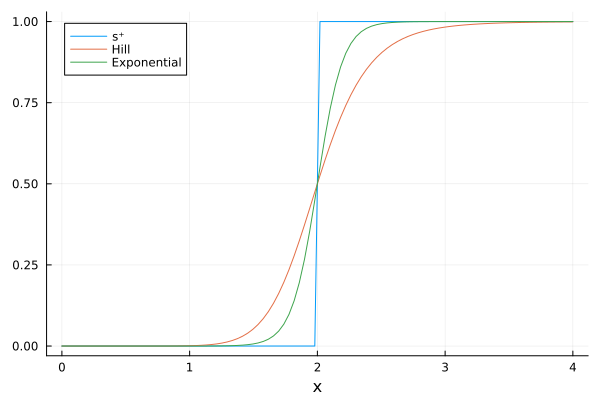

In [1]:
using Plots
θ = 2
k = 10
x = range(0, 4; length=100)
y1 = (x .> θ)
y2 = x .^ k ./ (x .^ k .+ θ^k)
y3 = 1 .- 1 ./ (1 .+ exp.(k*(x .- θ)))
plot(x, [y1, y2, y3]; label=["s⁺" "Hill" "Exponential"], xlabel="x")

and for $|u-1|$:

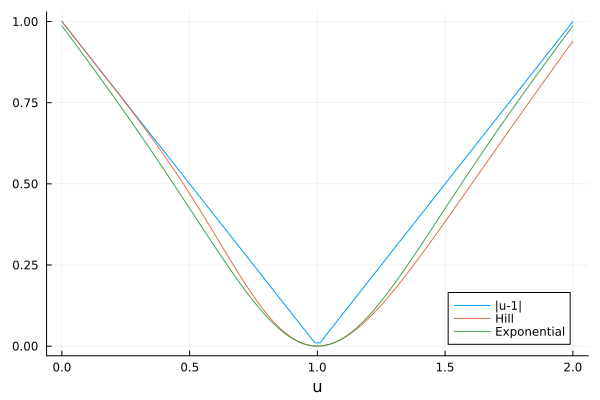

In [2]:
k = 5
u = range(0, 2; length=100)
y1 = abs.(u .- 1)
y2 = (u .- 1) .* (u .^ k .- 1) ./ (u .^ k .+ 1)
y3 = (u .- 1) .* (1 .- 2 ./ (1 .+ exp.(k .* (u .- 1))))
plot(u, [y1, y2, y3]; label=["|u-1|" "Hill" "Exponential"], xlabel="u")

[^1]: Agustín G. Yabo, Nicolas Augier. On L¹ and time-optimal state transitions in piecewise linear models of gene-regulatory networks. Preprint. 2024. [https://hal.science/hal-04820387](https://hal.science/hal-04820387).

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*